In [1]:
import sklearn
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
import os
print(os.listdir("/Users/revan/Desktop/257/train+val"))

Using TensorFlow backend.


['black_measles', 'black_rot', 'healthy', 'leaf_blight']


In [2]:
fruit_images = []
labels = [] 
for fruit_dir_path in glob.glob("/Users/revan/Desktop/257/train+val/*"):
    fruit_label = fruit_dir_path.split("\\")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
        fruit_images.append(image)
        labels.append(fruit_label)
fruit_images = np.array(fruit_images)
fruit_images = fruit_images.reshape(len(fruit_images),-1)
labels = np.array(labels)
labels

array(['black_measles', 'black_measles', 'black_measles', ...,
       'leaf_blight', 'leaf_blight', 'leaf_blight'], dtype='<U13')

In [3]:
print(np.shape(fruit_images))
# print(fruit_images)
# print(labels)

(4071, 65536)


In [9]:
from sklearn import svm

clf = svm.SVC(decision_function_shape='ovo',probability=True)

clf.fit(grape_images, labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [11]:
count=0 
total = np.shape(validation_grape_images)[0]
print(total)
for i in range(total):
    check=clf.predict([validation_grape_images[i]])
    if check[0] == validation_labels[i] :
        count += 1
print(count)
print("Accuracy is ", count/total)

811
667
Accuracy is  0.8224414303329223


Confusion matrix
Classification report
               precision    recall  f1-score   support

black_measles       0.82      0.84      0.83       269
    black_rot       0.77      0.74      0.76       243
      healthy       0.89      0.97      0.93        77
  leaf_blight       0.87      0.84      0.85       222

     accuracy                           0.82       811
    macro avg       0.84      0.85      0.84       811
 weighted avg       0.82      0.82      0.82       811



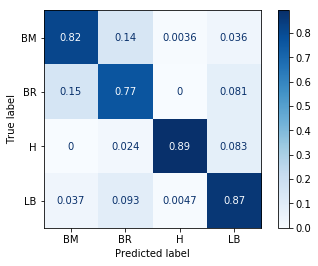

In [12]:
# Testing the data

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

predicted_result = clf.predict(validation_fruit_images)

print("Confusion matrix")
plot_confusion_matrix(clf,validation_fruit_images,validation_labels,display_labels=['BM','BR','H','LB'],normalize="true",cmap=plt.cm.Blues,)

print("Classification report")
print(classification_report(predicted_result,validation_labels))




In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_black_measles= ( labels == 'black_measles') 
y_train_black_rot=(labels == 'black_rot')
y_train_leaf_blight=(labels == 'leaf_blight')
y_train_healthy=(labels == 'healthy')

y_test_black_measles = (validation_labels == 'black_measles')
y_test_black_rot = (validation_labels == 'black_rot')
y_test_leaf_blight = (validation_labels == 'leaf_blight')
y_test_healthy = (validation_labels == 'healthy')

y_probas_forest = cross_val_predict(clf, fruit_images,
                                    y_train_black_measles, cv=3,
                                    method="predict_proba")
y_probas_forest2 = cross_val_predict(clf, fruit_images,
                                    y_train_black_rot, cv=3,
                                    method="predict_proba")
y_probas_forest3 = cross_val_predict(clf, fruit_images,
                                    y_train_healthy, cv=3,
                                    method="predict_proba")
y_probas_forest4 = cross_val_predict(clf, fruit_images,
                                    y_train_leaf_blight, cv=3,
                                    method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] 
y_scores_forest2 = y_probas_forest2[:, 1]
y_scores_forest3 = y_probas_forest3[:, 1]
y_scores_forest4 = y_probas_forest4[:, 1]


In [ ]:
#Training
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def plot_roc_curve(fpr, tpr, label ="Random Forest"):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

fpr, tpr, thresholds = roc_curve(y_train_black_measles, 
                                                      y_scores_forest)

fpr2, tpr2, thresholds = roc_curve(y_train_black_rot, 
                                                      y_scores_forest2)

fpr3, tpr3, thresholds = roc_curve(y_train_healthy, 
                                                      y_scores_forest3)

fpr4, tpr4, thresholds = roc_curve(y_train_leaf_blight, 
                                                      y_scores_forest4)
plot_roc_curve(fpr, tpr, "Black Measles: AUC-"+str(roc_auc_score(y_train_black_measles, y_scores_forest)))
plot_roc_curve(fpr2, tpr2, "Black Rot: AUC-"+str(roc_auc_score(y_train_black_rot, y_scores_forest2)))
plot_roc_curve(fpr3, tpr3, "Healthy: AUC-"+str(roc_auc_score(y_train_healthy, y_scores_forest3)))
plot_roc_curve(fpr4, tpr4, "Leaf Blight: AUC-"+str(roc_auc_score(y_train_leaf_blight, y_scores_forest4)))

plt.legend(loc="lower right")

plt.show()

In [ ]:
#testing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def plot_roc_curve(fpr, tpr, label ="Random Forest"):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

fpr, tpr, thresholds = roc_curve(y_test_black_measles, 
                                                      y_scores_forest)

fpr2, tpr2, thresholds = roc_curve(y_test_black_rot, 
                                                      y_scores_forest2)

fpr3, tpr3, thresholds = roc_curve(y_test_healthy, 
                                                      y_scores_forest3)

fpr4, tpr4, thresholds = roc_curve(y_test_leaf_blight, 
                                                      y_scores_forest4)
plot_roc_curve(fpr, tpr, "Black Measles: AUC-"+str(roc_auc_score(y_test_black_measles, y_scores_forest)))
plot_roc_curve(fpr2, tpr2, "Black Rot: AUC-"+str(roc_auc_score(y_test_black_rot, y_scores_forest2)))
plot_roc_curve(fpr3, tpr3, "Healthy: AUC-"+str(roc_auc_score(y_test_healthy, y_scores_forest3)))
plot_roc_curve(fpr4, tpr4, "Leaf Blight: AUC-"+str(roc_auc_score(y_test_leaf_blight, y_scores_forest4)))

plt.legend(loc="lower right")

plt.show()